In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
routes = pd.read_csv('kaggle_data/routes.csv')

In [3]:
routes

,index,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...,...
67658,67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [4]:
route_counts = routes.groupby(['Source airport', 'Destination airport']).count().reset_index()

In [5]:
route_counts

,Source airport,Destination airport,index,Airline,Airline ID,Source airport ID,Destination airport ID,Codeshare,Stops,Equipment
0,AAE,ALG,1,1,1,1,1,0,1,1
1,AAE,CDG,1,1,1,1,1,0,1,1
2,AAE,IST,1,1,1,1,1,0,1,1
3,AAE,LYS,1,1,1,1,1,0,1,1
4,AAE,MRS,2,2,2,2,2,0,2,2
...,...,...,...,...,...,...,...,...,...,...
37590,ZYI,SZX,1,1,1,1,1,0,1,1
37591,ZYI,WUH,1,1,1,1,1,0,1,1
37592,ZYI,XIY,1,1,1,1,1,0,1,1
37593,ZYI,XMN,1,1,1,1,1,0,1,1


In [6]:
route_counts = route_counts[['Source airport', 'Destination airport', 'Airline']]

In [7]:
# take only routes traveled by at least 5 airlines (hopefully a rough measure of importance)
route_subset = route_counts[route_counts['Airline'] >= 5]
source_airports = set(route_subset['Source airport'].unique())
destination_airports = set(route_subset['Destination airport'].unique())

In [8]:
route_subset

,Source airport,Destination airport,Airline
55,ABJ,ACC,7
69,ABJ,LFW,5
73,ABJ,OUA,7
79,ABQ,ATL,5
90,ABQ,LAX,5
...,...,...,...
37187,YZF,YEG,6
37221,YZV,YWK,5
37463,ZRH,LIS,6
37516,ZRH,VIE,5


In [9]:
airports_subset = source_airports | destination_airports

In [10]:
airports_data = pd.read_csv('kaggle_data/airports.csv')

In [11]:
airports_data

,index,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,7693,14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
7694,7694,14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
7695,7695,14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
7696,7696,14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


In [12]:
airports_data_subset = airports_data[airports_data["IATA"].isin(airports_subset)]

In [13]:
# check for missing airports data
airports_subset - set(airports_data_subset["IATA"])

{'INC'}

In [14]:
# get long-lat coordinates of each airport
long_lat_pairs = zip(airports_data_subset['Longitude'], airports_data_subset['Latitude'])
pos = dict(zip(airports_data_subset['IATA'], long_lat_pairs))
# fill in missing data
pos.update({'INC': (106.3925, 38.321667)})

In [15]:
# create graph with edges weighted by number of airlines
G = nx.DiGraph()
G.add_nodes_from(airports_subset)
G.add_weighted_edges_from(zip(route_subset['Source airport'], route_subset['Destination airport'], route_subset['Airline']))

In [16]:
clustering_coeffs = nx.clustering(G, nodes=None, weight=None)

In [17]:
# Get the maximum clustering coefficient for normalization
max_cc = max(clustering_coeffs.values())

In [18]:
# Normalize the clustering coefficients for mapping to colors
normalized_cc = {node: cc / max_cc for node, cc in clustering_coeffs.items()}

In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap as Basemap #if you're having trouble importing this package
# try '[pip/conda/whatever package manager] install basemap'

basemap_world = Basemap(
        projection='merc',
        llcrnrlon=-180,
        llcrnrlat=-70,
        urcrnrlon=180,
        urcrnrlat=80,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True
)

# the bounds on this one are closer to contiguous US, Mexico, Canada
# for diff data the bounds might be expanded to show more
basemap_na = Basemap(
        projection='merc',
        llcrnrlon=-130,
        llcrnrlat=10,
        urcrnrlon=-50,
        urcrnrlat=60,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True
)

basemap_eu = Basemap(
        projection='merc',
        llcrnrlon=-25,
        llcrnrlat=15,
        urcrnrlon=60,
        urcrnrlat=65,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True
)

basemap_asia = Basemap(
        projection='merc',
        llcrnrlon=70,
        llcrnrlat=-10,
        urcrnrlon=145,
        urcrnrlat=60,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True
)


def plot_network(G, basemap, pos, cbar=True, ax=None):
    """
    Draws the graph G on the basemap.

    Parameters
    ----------
    G : any NetworkX graph type
        Graph to be plotted.

    basemap : mpl_toolkits.Basemap
        Basemap to be plotted on

    pos : dict
        Coordinates of each node on the basemap. Keys should be the name of
        the node, values should be tuples of (long, lat) coords.

    ax : Matplotlib Axes object, or None, optional
        Plot on the specified axis. If None, plot on new axis.
    """

    if not ax:
        fig, ax = plt.subplots(figsize=(20,10))

    # transform positions based on basemap
    pos = {label : basemap(*coord) for label, coord in pos.items()}

    # plot basemap
    basemap.fillcontinents(color='#BBBBBB', ax=ax)
    basemap.drawstates(color='#888888', ax=ax)

    edgelist = list(G.edges())
    weights = [G.edges()[edge]['weight'] for edge in edgelist]

    # plot graph
    cmap = mpl.colormaps['viridis']
    nx.draw(
        G,
        pos,
        edgelist=edgelist,
        ax=ax,
        node_size=3,
        node_color=list(clustering_coeffs.values()),
        edge_cmap=cmap,
        edge_color=weights,
        edge_vmin=min(weights),
        edge_vmax=max(weights),
        alpha=0.5,
    )
    plt.show()
    if cbar:
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(weights), vmax=max(weights)))
        sm._A=[]
        plt.colorbar(sm, ax=ax)

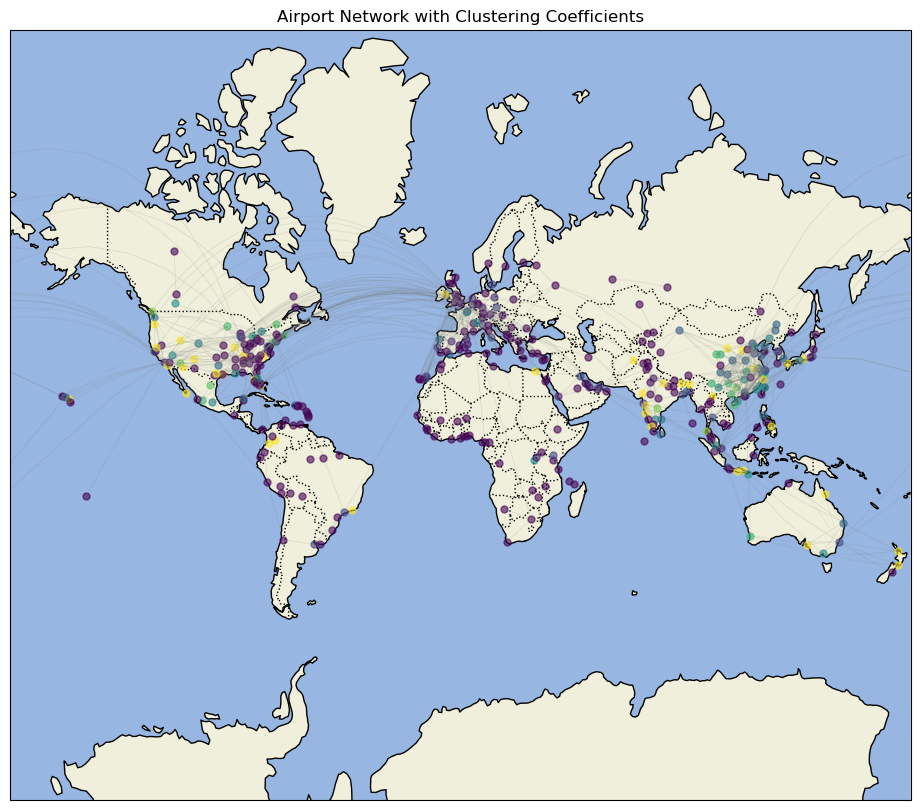

In [20]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_network(G, pos, node_colors):
    plt.figure(figsize=(20, 10))
    
    # Create map with Mercator projection
    ax = plt.axes(projection=ccrs.Mercator())
    
    # Add map features
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Set map bounds
    ax.set_global()
    
    # Plot nodes
    for node, (lon, lat) in pos.items():
        ax.plot(lon, lat, 'o', 
                transform=ccrs.PlateCarree(),
                color=plt.cm.viridis(node_colors[node]),
                markersize=5,
                alpha=0.6)
    
    # Plot edges
    for (source, target) in G.edges():
        if source in pos and target in pos:
            lon1, lat1 = pos[source]
            lon2, lat2 = pos[target]
            plt.plot([lon1, lon2], [lat1, lat2],
                    transform=ccrs.Geodetic(),
                    color='gray',
                    alpha=0.1,
                    linewidth=0.5)
    
    plt.title('Airport Network with Clustering Coefficients')
    return plt

# Create the visualization
plot_network(G, pos, normalized_cc)
plt.savefig("5+_airlines_network.png", dpi=300, bbox_inches='tight')


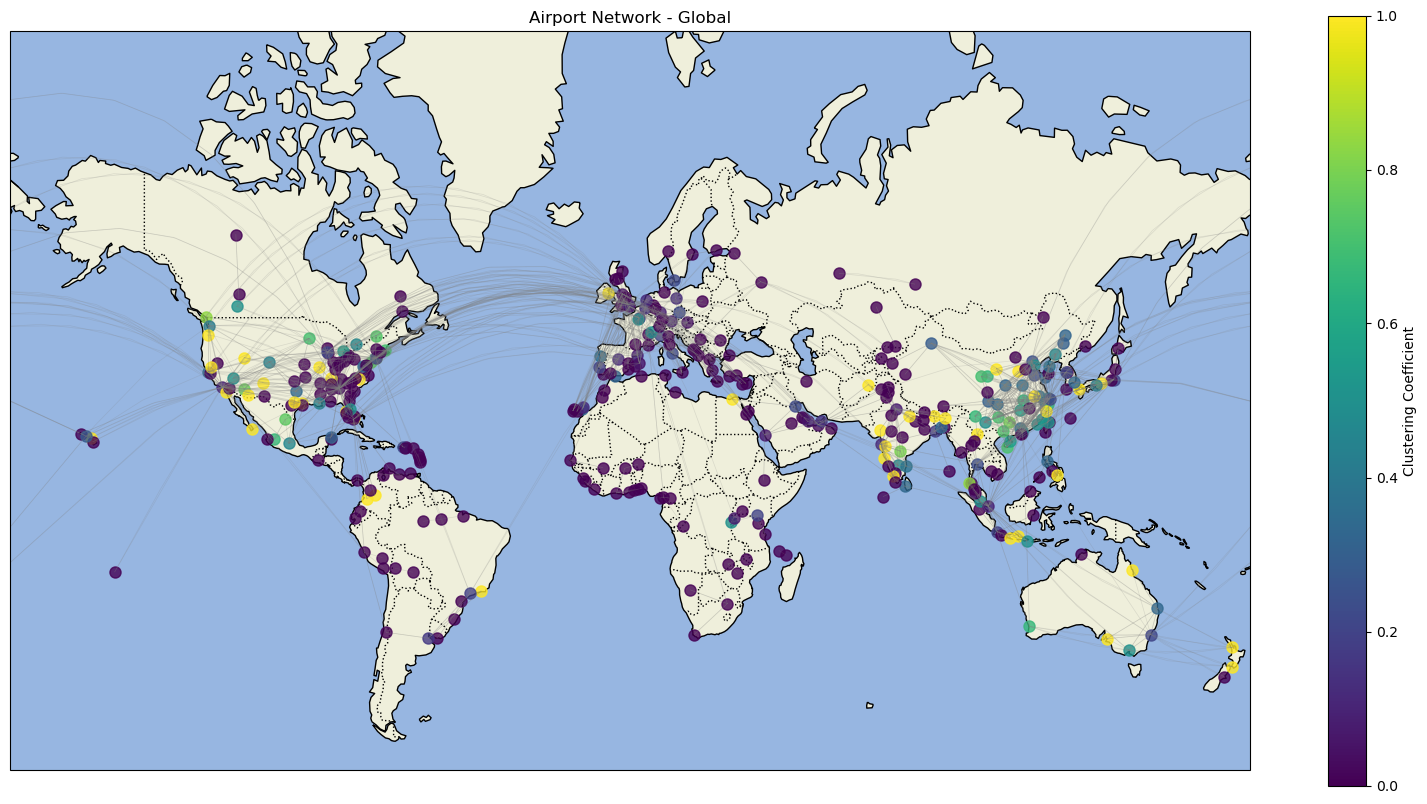

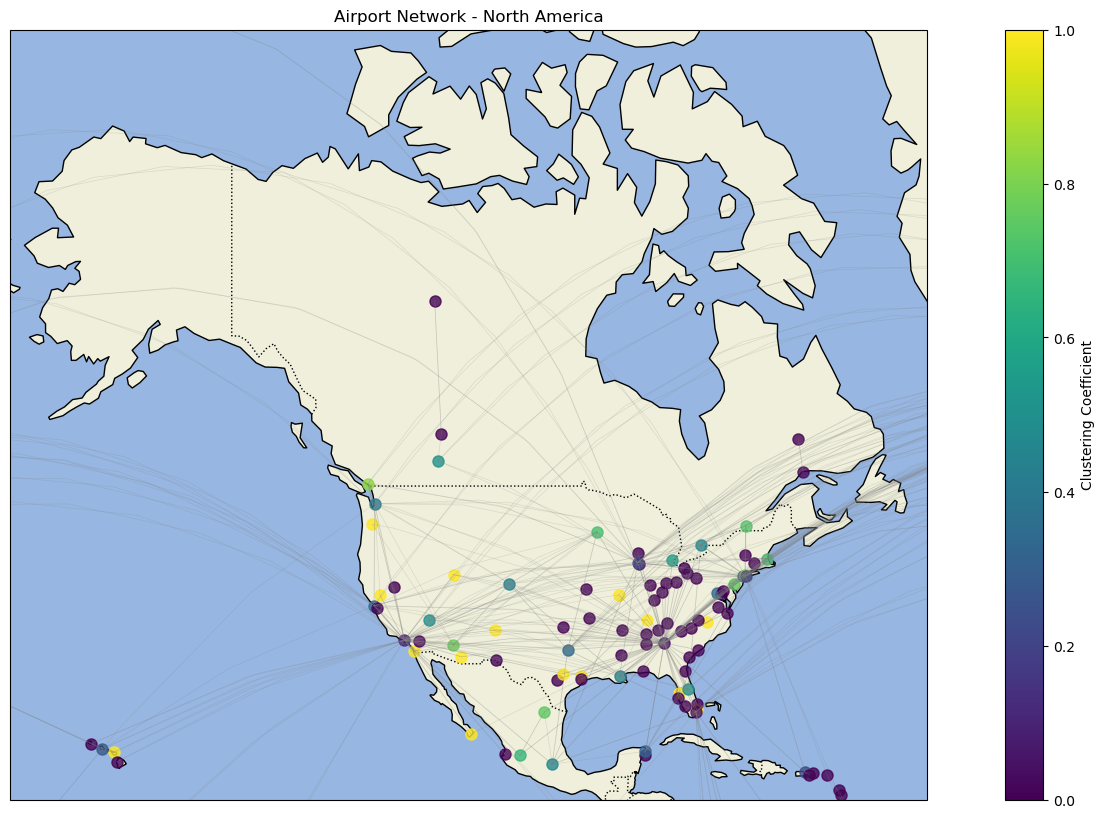

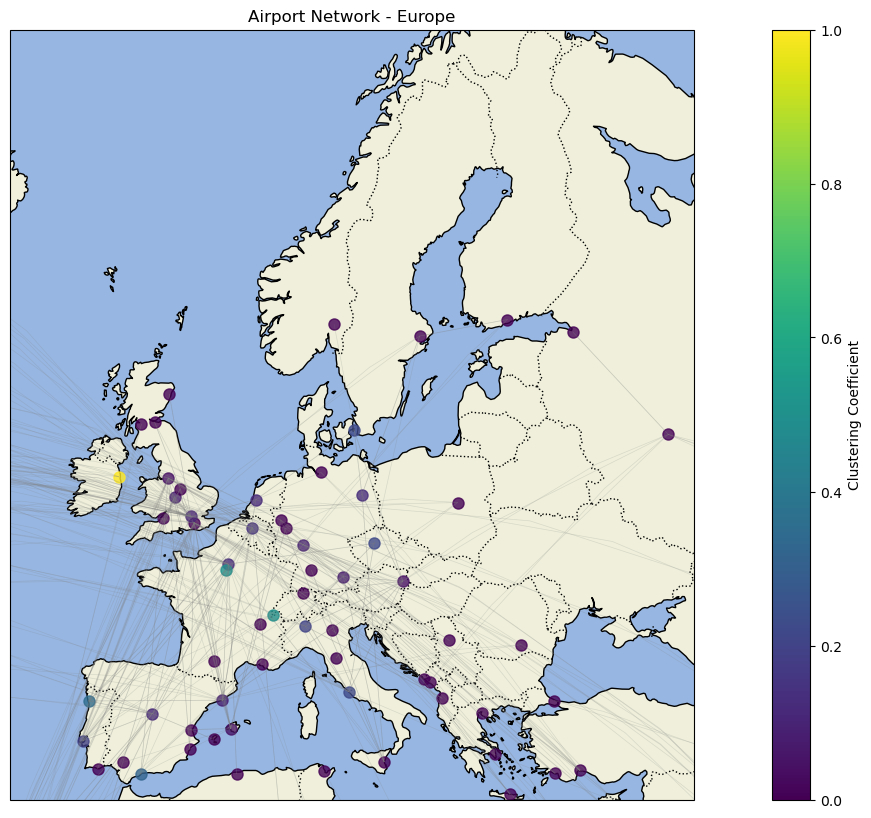

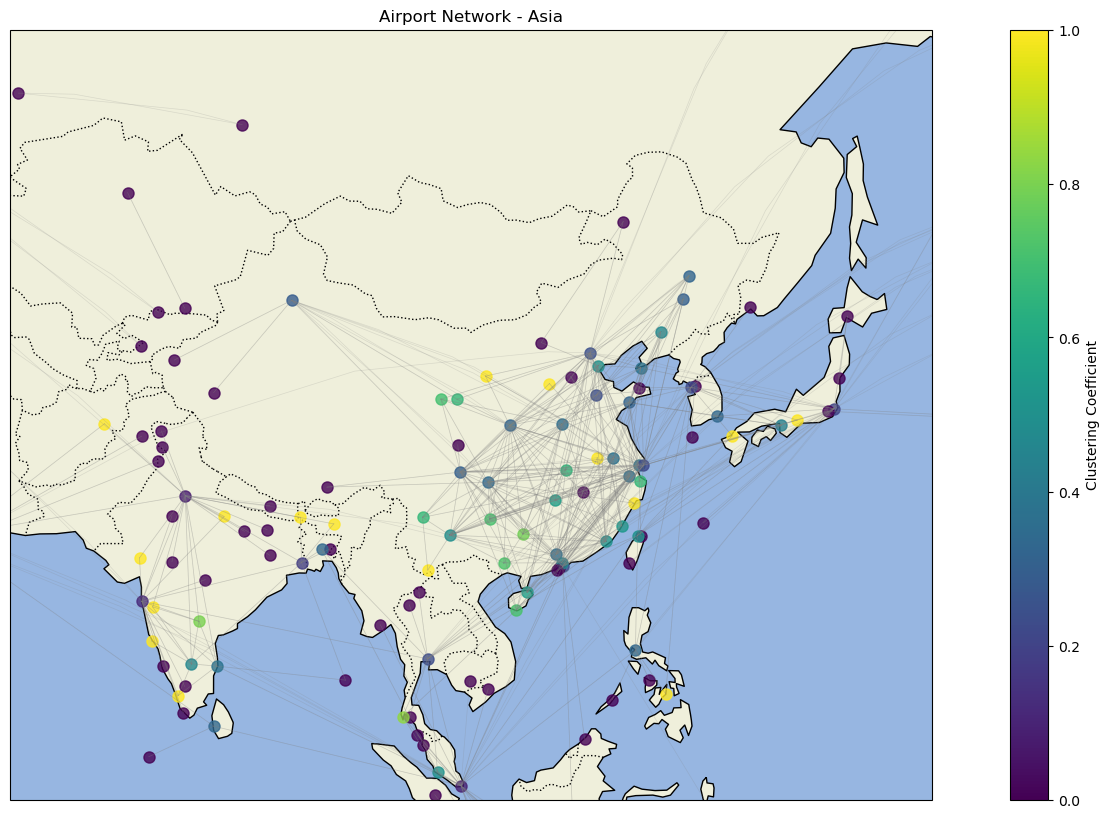

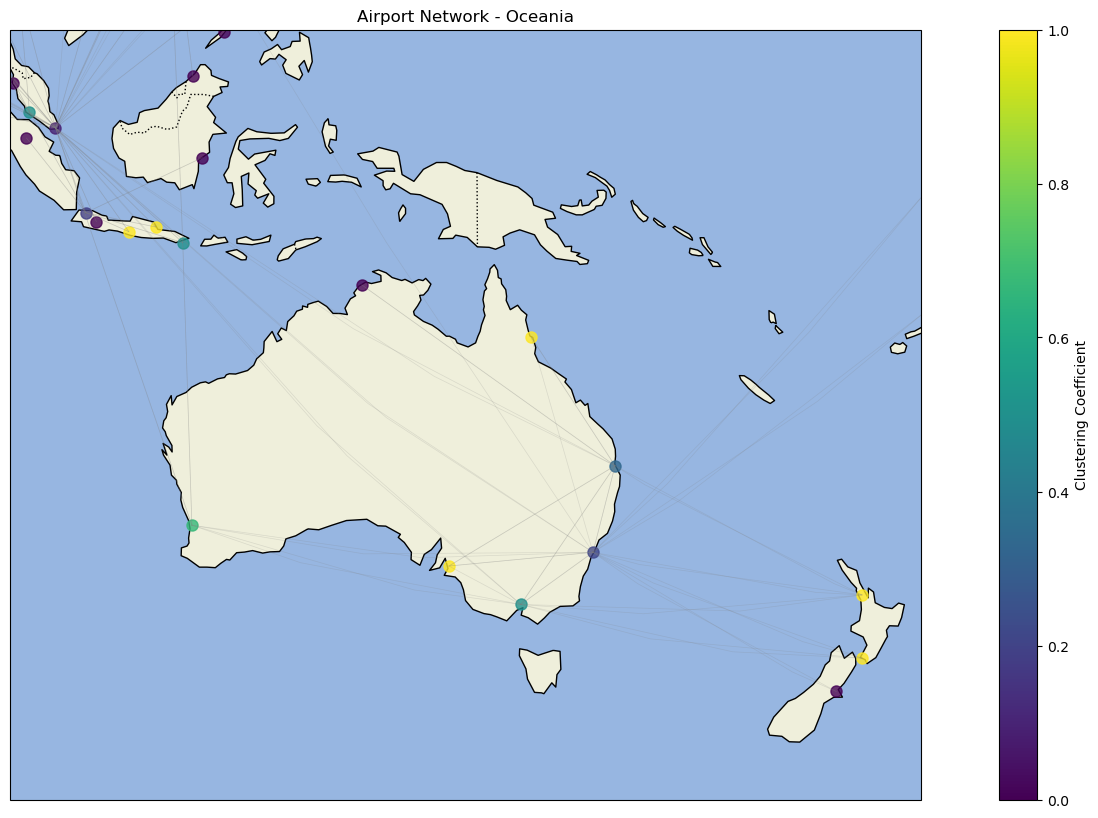

In [21]:
def plot_network_region(G, pos, node_colors, region='global', title=None):
    """
    Plot network for a specific region
    
    Parameters:
    -----------
    G : NetworkX graph
    pos : dict of node positions
    node_colors : dict of node colors
    region : str, one of ['global', 'north_america', 'europe', 'asia', 'oceania']
    title : str, optional title for the plot
    """
    # Define region bounds
    regions = {
        'global': {'lon': (-180, 180), 'lat': (-60, 80)},
        'north_america': {'lon': (-170, -50), 'lat': (15, 75)},
        'europe': {'lon': (-15, 40), 'lat': (35, 70)},
        'asia': {'lon': (60, 150), 'lat': (0, 60)},
        'oceania': {'lon': (100, 180), 'lat': (-50, 10)}
    }
    
    bounds = regions[region]
    
    plt.figure(figsize=(20, 10))
    ax = plt.axes(projection=ccrs.Mercator())
    
    # Add map features
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Set map bounds for the region
    ax.set_extent([bounds['lon'][0], bounds['lon'][1], 
                  bounds['lat'][0], bounds['lat'][1]], 
                  crs=ccrs.PlateCarree())
    
    # Plot nodes
    for node, (lon, lat) in pos.items():
        # Check if node is within bounds
        if (bounds['lon'][0] <= lon <= bounds['lon'][1] and 
            bounds['lat'][0] <= lat <= bounds['lat'][1]):
            ax.plot(lon, lat, 'o', 
                    transform=ccrs.PlateCarree(),
                    color=plt.cm.viridis(node_colors[node]),
                    markersize=8,
                    alpha=0.8)
    
    # Plot edges
    for (source, target) in G.edges():
        if source in pos and target in pos:
            lon1, lat1 = pos[source]
            lon2, lat2 = pos[target]
            # Check if either endpoint is in bounds
            if ((bounds['lon'][0] <= lon1 <= bounds['lon'][1] and 
                 bounds['lat'][0] <= lat1 <= bounds['lat'][1]) or
                (bounds['lon'][0] <= lon2 <= bounds['lon'][1] and 
                 bounds['lat'][0] <= lat2 <= bounds['lat'][1])):
                plt.plot([lon1, lon2], [lat1, lat2],
                        transform=ccrs.Geodetic(),
                        color='gray',
                        alpha=0.2,
                        linewidth=0.5)
    
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, 
                              norm=plt.Normalize(vmin=0, vmax=max(node_colors.values())))
    plt.colorbar(sm, ax=ax, label='Clustering Coefficient')
    
    if title:
        plt.title(title)
    return plt

# Create visualizations for each region
regions = ['global', 'north_america', 'europe', 'asia', 'oceania']
for region in regions:
    plot_network_region(G, pos, normalized_cc, region=region,
                       title=f'Airport Network - {region.replace("_", " ").title()}')
    plt.savefig(f'network_{region}.png', dpi=300, bbox_inches='tight')

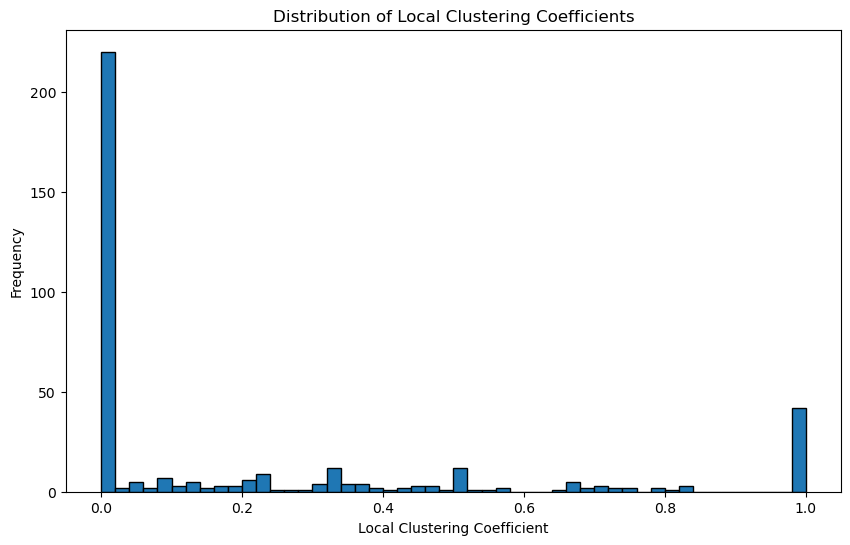

In [22]:
# Create histogram of Local Clustering Coefficients
plt.figure(figsize=(10, 6))
plt.hist(list(clustering_coeffs.values()), bins=50, edgecolor='black')
plt.title('Distribution of Local Clustering Coefficients')
plt.xlabel('Local Clustering Coefficient')
plt.ylabel('Frequency')
plt.savefig('clustering_coefficient_distribution.png')


In [23]:
# Find airports with lowest clustering coefficients (structural holes)
sorted_airports = sorted(clustering_coeffs.items(), key=lambda x: x[1])
top_20_structural_holes = sorted_airports[:20]

# Create a DataFrame with airport details for the structural holes
structural_holes_df = pd.DataFrame(top_20_structural_holes, columns=['Airport', 'Clustering Coefficient'])
structural_holes_df = structural_holes_df.merge(
    airports_data[['IATA', 'Name', 'City', 'Country']], 
    left_on='Airport', 
    right_on='IATA',
    how='left'
).drop('IATA', axis=1)

print("\nTop 20 Structural Holes (Airports with lowest clustering coefficients):")
print(structural_holes_df.to_string(index=False))

# Calculate some statistics about clustering coefficients
print("\nClustering Coefficient Statistics:")
print(f"Average clustering coefficient: {nx.average_clustering(G):.4f}")
print(f"Global transitivity: {nx.transitivity(G):.4f}")
print(f"Minimum clustering coefficient: {min(clustering_coeffs.values()):.4f}")
print(f"Maximum clustering coefficient: {max(clustering_coeffs.values()):.4f}")


Top 20 Structural Holes (Airports with lowest clustering coefficients):
Airport  Clustering Coefficient                                            Name        City        Country
    PIT                       0                Pittsburgh International Airport  Pittsburgh  United States
    CPT                       0                 Cape Town International Airport   Cape Town   South Africa
    HRE                       0     Robert Gabriel Mugabe International Airport      Harare       Zimbabwe
    CHS                       0 Charleston Air Force Base-International Airport  Charleston  United States
    IXR                       0                             Birsa Munda Airport      Ranchi          India
    LLW                       0                  Lilongwe International Airport    Lilongwe         Malawi
    ARN                       0                       Stockholm-Arlanda Airport   Stockholm         Sweden
    CNX                       0                Chiang Mai International